In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

Import the data

In [10]:
df = pd.read_excel('E:\Me\AirBnb Survey_1.xlsx', engine='openpyxl')
df_org = pd.read_excel('E:\Me\AirBnb Survey_1.xlsx', engine='openpyxl')
df.head()

,Respondents ID,Sex,Age,Educ,Income,Status,COL,EWOM,LUA,FEM,LTO,RES,ATT,SN,IN1,IN2
0,0,0,0,1,0,0,2.000000,1.25,2.0,3.00,2.333333,2.666667,1.75,2.5,2,2
1,1,1,0,1,0,0,3.000000,2.75,1.4,2.25,1.666667,2.000000,2.00,2.5,3,2
2,2,1,2,1,0,0,1.666667,3.50,1.6,1.50,2.666667,1.666667,2.50,2.5,3,2
3,3,1,2,2,1,1,3.000000,2.00,2.4,3.25,2.333333,1.666667,1.50,2.5,3,3
4,4,1,0,1,0,0,3.666667,1.25,1.6,3.00,2.000000,1.666667,3.25,3.0,4,3


Checking all the columns

In [35]:
df_org.columns

Index(['Respondents ID', ' Sex ', ' Age ', ' Educ ', ' Income ', ' Status ',
       'COL', 'EWOM', 'LUA', 'FEM', 'LTO', 'RES', 'ATT', 'SN', ' IN1 ',
       ' IN2 '],
      dtype='object')

Remove the space in the name of somw columns

In [11]:
df_org = df_org.rename(columns= {' Sex ': 'Sex', ' Age ': 'Age', ' Educ ':'Educ',' Income ':'Income', ' Status ':'Status', ' IN1 ':'IN1', ' IN2 ':'IN2'})

Round the value in column to 0 decimal for analyzing

In [12]:
df= df.round(decimals=0).astype(int)

Replace categorical value with the actual values (?)

In [13]:
vals_replace_sex = {1:'Female', 0 :'Male'}
df[' Sex '] = df[' Sex '].map(vals_replace_sex)
df[' Sex '].head()

0      Male
1    Female
2    Female
3    Female
4    Female
Name:  Sex , dtype: object

In [14]:
val_replace_COL = {1:'No', 2:'A little', 3:'Moderately', 4:'Highly', 5:'Extremely'}
df[['COL','EWOM','LUA','FEM','LTO','RES','ATT','SN',' IN1 ',' IN2 ']] = df[['COL','EWOM','LUA','FEM','LTO','RES','ATT','SN',' IN1 ',' IN2 ']].stack().map(val_replace_COL).unstack()
df['COL'].head()


0      A little
1    Moderately
2      A little
3    Moderately
4        Highly
Name: COL, dtype: object

In [15]:
val_replace_age = {0:'18 to 22', 1:'23 to 30', 2:'31 to 40', 3:'41 to 40', 4:'above 50'}
df[' Age '] = df[' Age '].map(val_replace_age)
df[' Age '].head()

0    18 to 22
1    18 to 22
2    31 to 40
3    31 to 40
4    18 to 22
Name:  Age , dtype: object

In [16]:
val_replace_educ = {0: 'highschool or lower', 1:'university', 2:'post graduate'}
df[' Educ '] = df[' Educ '].map(val_replace_educ)
df[' Educ '].head()

0       university
1       university
2       university
3    post graduate
4       university
Name:  Educ , dtype: object

In [17]:
val_replace_income = {0: 'under 7m', 1:'7-10m', 2:'10-20m', 3:'21-30m', 4:'above 30m'}
df[' Income '] = df[' Income '].map(val_replace_income)
df[' Income '].head()

0    under 7m
1    under 7m
2    under 7m
3       7-10m
4    under 7m
Name:  Income , dtype: object

In [18]:
val_replace_status = {0:'no', 1:'yes'}
df[' Status '] = df[' Status '].map(val_replace_status)
df[' Status '].head()

0     no
1     no
2     no
3    yes
4     no
Name:  Status , dtype: object

Exploratory analysis

In [44]:
def graph():
    columns_list = list(df.columns)
    columns_list.remove('Respondents ID')
    for x in columns_list :
        attr_count = df[x].value_counts().rename_axis(x).reset_index(name='Count')
        attr_count.sort_values(by=x, inplace=True)
        
        fig, ax = plt.subplots(figsize = (16,9))
        ax.barh(attr_count[x], attr_count['Count'])
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.5,
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')
        ax.set_title(f'Distribution of respodent{x.lower()}', loc='left')
        plt.show()

In [ ]:
graph()

Using chi-square test to check the correlation between respondents' answers and their intentions to use AirBnb

In [46]:
def chi_square():
    columns_list = list(df.columns)
    columns_list.remove('Respondents ID')
    for x in columns_list:
        cross_tab = pd.crosstab(df[x], df[' IN1 '], margins=True)
        stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
        print(f"The p value for {x} is {str(round(p,2))}")


In [47]:
chi_square()

The p value for  Sex  is 0.61
The p value for  Age  is 0.93
The p value for  Educ  is 0.99
The p value for  Income  is 0.89
The p value for  Status  is 0.36
The p value for COL is 0.0
The p value for EWOM is 0.0
The p value for LUA is 0.0
The p value for FEM is 0.0
The p value for LTO is 0.72
The p value for RES is 0.61
The p value for ATT is 0.0
The p value for SN is 0.0
The p value for  IN1  is 0.0
The p value for  IN2  is 0.0


COL, EWOM, LUA, FEM, ATT, SN have p-value lower then 0.05. Therefore we deny the null hypothesis that their is no correlation between them and IN1

Using Linear Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(z, df_org['IN1'], test_size = 0.3, random_state = 0)

In [ ]:
lr = LinearRegression()
Rsqu_test = []
order = [1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['COL', 'EWOM', 'LUA', 'FEM', 'ATT', 'SN']])
    x_test_pr = pr.fit_transform(x_test[['COL', 'EWOM', 'LUA', 'FEM', 'ATT', 'SN']])
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
print(Rsqu_test)


[0.6790712515346644, 0.5924743894428939, -0.8614501735383575, -3985.667783442374]


In [48]:
lm = LinearRegression()
z = df_org[['COL', 'EWOM', 'LUA', 'FEM', 'ATT', 'SN']]
lm.fit(z, df_org['IN1'])
print(f'Intercept: {lm.intercept_}')
print(f'Coefs: {lm.coef_}')

Intercept: 0.8318700128069585
Coefs: [ 0.09397067 -0.04625572 -0.13662349  0.05378754  0.0415287   0.87157985]


The formula is 0.8318700128069585 + 0.09397067*COL - 0.04625572*EWOM - 0.13662349*LUA + 0.05378754*FEM + 0.0415287*ATT + 0.87157985*SN

In [49]:
Yhat = lm.predict(z)
coef = r2_score(df_org['IN1'], Yhat)
coef


0.6293351611300749

C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IN1', ylabel='Density'>

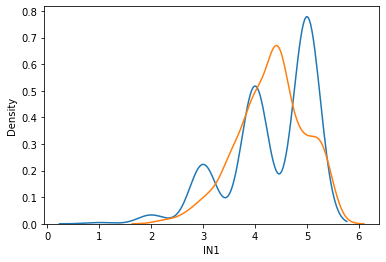

In [105]:
ax1 = sns.distplot(df_org['IN1'], hist=False)
sns.distplot(Yhat, hist=False)